# Statistics

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [6]:
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\income.csv")
df

,name,Income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,1000000


In [8]:
df.Income.describe()

count          7.000000
mean      148214.285714
std       375604.829702
min         4000.000000
25%         5500.000000
50%         7000.000000
75%         7750.000000
max      1000000.000000
Name: Income, dtype: float64

In [11]:
df.Income.quantile(0.25)         # Find the 25% of the data

5500.0

In [12]:
df.Income.quantile(0.50)

7000.0

In [13]:
df.Income.quantile(1)

1000000.0

In [15]:
df.Income.quantile(0.50,interpolation='lower')

7000

In [17]:
df.Income.quantile(0.1,interpolation='higher')

5000

In [21]:
percentile_99=df.Income.quantile(0.99)
percentile_99

940479.9999999995

In [22]:
df[df.Income > percentile_99]

,name,Income
6,Elon Musk,1000000


In [30]:
df_no_outlier = df[df.Income < percentile_99]
df_no_outlier                   # Removed the outlier using the quantile method

,name,Income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
4,Mohan,8000.0
5,Tao,7000.0


In [28]:
df['Income'][3]= np.NaN

C:\Users\Admin\AppData\Local\Temp\ipykernel_7112\4124638690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'][3]= np.NaN


In [29]:
df

,name,Income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,NaN
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,1000000.0


In [33]:
df_new = df.fillna(df.Income.mean())
df_new                                      # Mean not fit correctly

,name,Income
0,Rob,5000.000000
1,Rafiq,6000.000000
2,Nina,4000.000000
3,Sofia,171666.666667
4,Mohan,8000.000000
5,Tao,7000.000000
6,Elon Musk,1000000.000000


In [35]:
df_new = df.fillna(df.Income.median())
df_new                                  # fill the NAN value using the Median

,name,Income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,6500.0
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,1000000.0


# Normal Distribution                                # Used for remove the outlier

In [36]:
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [37]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

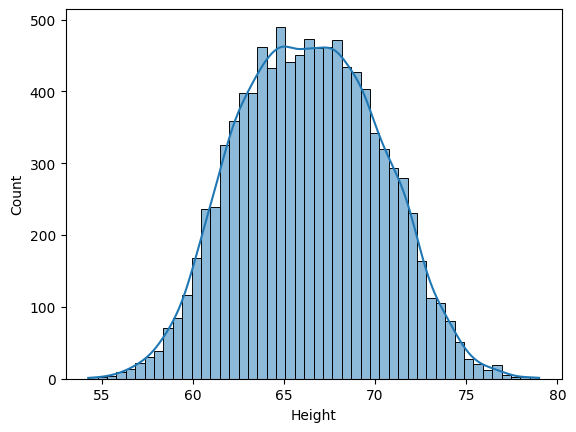

In [46]:
sn.histplot(df.Height,kde=True)

In [49]:
mean = df.Height.mean()
mean

66.36755975482124

In [50]:
std_deviation = df.Height.std()
std_deviation

3.8475281207732293

In [52]:
mean - 3 * std_deviation

54.82497539250156

In [53]:
mean + 3 * std_deviation

77.91014411714093

In [57]:
df[(df.Height > 77.91) | (df.Height < 54.82 )]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [60]:
df_no_outlier = df[(df.Height < 77.91) & (df.Height > 54.82)]
df_no_outlier.shape

(9993, 3)

# Zscore             # Used for remove the outlier

In [61]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [63]:
df['zscore'] = (df.Height-df.Height.mean())/df.Height.std()

In [65]:
df.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [67]:
df[df.zscore <  -3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [71]:
df_no_outlier = df[(df.zscore < 3) & (df.zscore > -3)]
df_no_outlier.shape

(9993, 4)

Exercise

In [94]:
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\BHP.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [93]:
df.price.describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

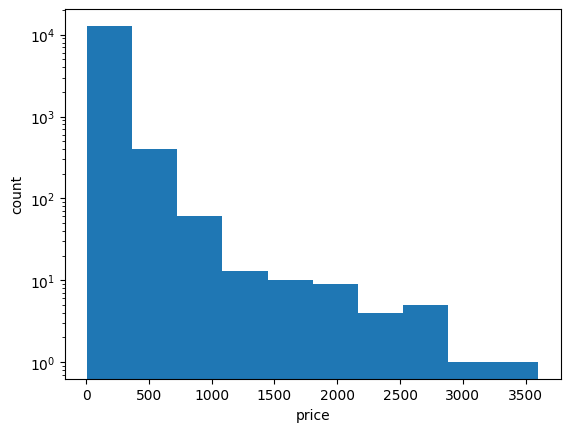

In [88]:
plt.hist(df.price)
plt.xlabel('price')
plt.ylabel('count')
plt.yscale('log')

In [76]:
min, max = df.price.quantile([0.001,0.999])
min,max

(11.159500000000001, 2000.0)

In [99]:
new_df = df[(df.price < max) & (df.price > min)]
new_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [100]:
df.shape

(13320, 9)

In [101]:
new_df.shape

(13291, 9)

In [103]:
df.shape[0] - new_df.shape[0]

29

In [80]:
new_df.price.describe()

count    13291.000000
mean       110.010361
std        125.434347
min         11.500000
25%         50.000000
50%         72.000000
75%        120.000000
max       1950.000000
Name: price, dtype: float64

In [107]:
mean = df.price.mean()
mean

112.5656265015015

In [108]:
std = df.price.std()
std

148.97167376967403

In [109]:
mean - 4 * std

-483.32106857719464

In [110]:
mean + 4 * std

708.4523215801976

In [112]:
df_no_outlier = df[(df.price < 708.45 ) & (df.price > -483.32)]
df_no_outlier.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [113]:
df.shape

(13320, 9)

In [114]:
df_no_outlier.shape

(13213, 9)

In [115]:
df.shape[0] - df_no_outlier.shape[0]

107